# Interference Experiment
<hr style="border-top-width: 4px; border-top-color: #34609b;">
ROOT is not only a tool for the one aiming to a prestigious scientific discovery, but also for education. This notebook illustrates how ROOT can be used to explain the [slits experiment](https://en.wikipedia.org/wiki/Double-slit_experiment). See also the treatment of this example in the [ROOT primer](https://root.cern.ch/root/htmldoc/guides/primer/ROOTPrimer.html#root-as-function-plotter).

In [1]:
import ROOT

Welcome to JupyROOT 6.07/01


## Writing the Function
Let's write in C++ the functions we will use to represent the interference figure. 
They will be JIT-ted: this will be more performant than a Python interpreted version.

In [2]:
%%cpp -d
auto pi = TMath::Pi();
double single(double *x, double *par){return pow(sin(pi*par[0]*x[0])/(pi*par[0]*x[0]),2);};
double nslit0(double *x, double *par){return pow(sin(pi*par[1]*x[0])/sin(pi*x[0]),2);};
double nslit(double *x, double *par){return single(x,par) * nslit0(x,par);};

We now write a [ROOT function](https://root.cern.ch/doc/master/classTF1.html) in Python wrapping the C++ function we created above. The number of points drawn is increased in order to visualize a smooth curve.

In [3]:
interfTF1 = ROOT.TF1("Slits interference",ROOT.nslit,-5.001,5.,2)
interfTF1.SetNpx(1000)

c = ROOT.TCanvas("c","c",1024,768)
def interFunction(Distances_Ratio, Number_Of_Slits):
    interfTF1.SetParameters(Distances_Ratio,Number_Of_Slits)
    interfTF1.Draw()
    c.Draw()

The parameters with which one can play are two:
1. The number of slits
2. The ratio of the distance between slits and the distance between the panels

In order to easily modify the parameters of the function, a *widget* is used.

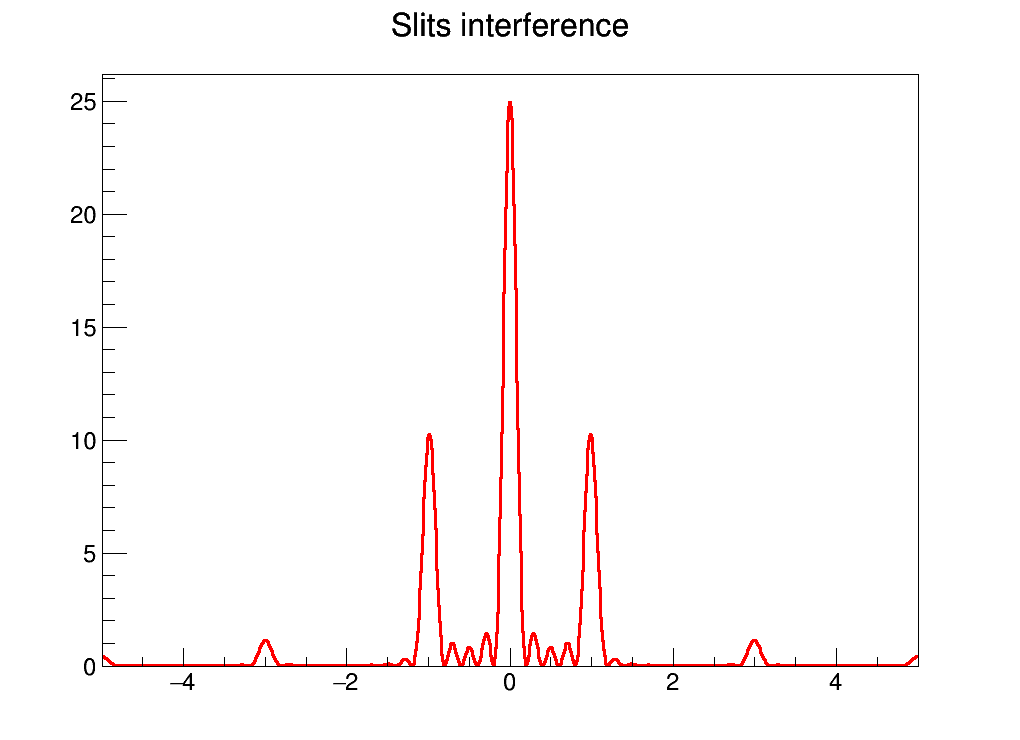

None

In [4]:
from IPython.html import widgets # we know it evolved, e.g. for iPython4
widgets.interact(interFunction, Distances_Ratio=(.05, 1., 0.05), Number_Of_Slits=(1, 10, 1));